In [65]:
from deap import base, creator, tools, algorithms
import random, numpy, seaborn
import matplotlib.pyplot as plt

In [98]:
class Knapsack:    
    def __init__ (self):
        self.items = []
        self.capacity = 0
        self.__initdata__()
        
    def __len__(self):
        return len(self.items)
    
    def __initdata__(self):
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("water", 153, 200),
            ("sandwich", 50, 160),
            ("glucose", 15, 60),
            ("tin", 68, 45),
            ("banana", 27, 60),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan cream", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof trousers", 42, 70),
            ("waterproof overclothes", 43, 75),
            ("note-case", 22, 80),
            ("sunglasses", 7, 20),
            ("towel", 18, 12),
            ("socks", 4, 50),
            ("book", 30, 10)]
        
        self.capacity = 400
        
    def getValue(self, chosenItems):
        currentWeight = currentValue = 0
        
        for i in range(len(chosenItems)):
            item, weight, value = self.items[i]
            
            if currentWeight + weight <= self.capacity:
                currentWeight += chosenItems[i] * weight
                currentValue += chosenItems[i] * value
        
        return currentValue

In [111]:
popSize = 200
crossover = 0.9
mutation = 0.3
generationsMax = 50
HOFsize = 1

In [112]:
toolbox = base.Toolbox()
toolbox.register("bit", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.bit, len(knapsack))
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def knapsackValue(individual):
    return knapsack.getValue(individual),
toolbox.register("evaluate", knapsackValue)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))

In [119]:
population = toolbox.populationCreator(n=popSize)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)
hof = tools.HallOfFame(HOFsize)
    
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=crossover, mutpb=mutation, 
                                              ngen=generationsMax, stats=stats, halloffame=hof, verbose=True)
best = hof.items[0]
print("Best Individual = ", best)
print("Best Fitness = ", best.fitness.values[0])
    
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")    

gen	nevals	max	avg    
0  	200   	837	577.245
1  	183   	885	680.785
2  	185   	915	761.01 
3  	194   	955	802.17 
4  	188   	960	823.125
5  	188   	970	858.88 
6  	188   	1005	876.135
7  	191   	1005	888.915
8  	188   	1000	903.495
9  	184   	1005	921.93 
10 	191   	1005	952.075
11 	182   	1030	967.72 
12 	183   	1030	977.13 
13 	192   	1030	971.2  
14 	185   	1030	975.67 
15 	181   	1030	976.585
16 	188   	1030	977.955
17 	187   	1030	980.89 
18 	184   	1030	984.44 
19 	185   	1030	985.765
20 	189   	1030	984.74 
21 	186   	1030	987.945
22 	176   	1030	996.415
23 	196   	1030	1005.5 
24 	174   	1030	1011.27
25 	193   	1030	1006.19
26 	195   	1030	1007.16
27 	187   	1030	1011.37
28 	192   	1030	1011.45
29 	179   	1030	1003.85
30 	183   	1030	1013.16
31 	191   	1030	1009.5 
32 	190   	1030	1013.01
33 	191   	1030	1001.44
34 	195   	1030	1012.17
35 	180   	1030	1006.55
36 	181   	1030	1003.83
37 	186   	1030	1006.35
38 	187   	1030	1006.83
39 	194   	1030	1016.76
40 	186   	1030	1011.88

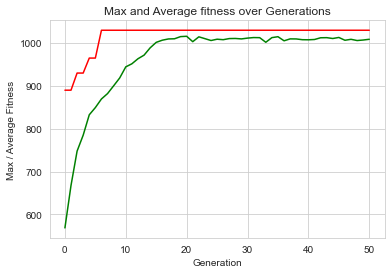

In [117]:
seaborn.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()